# NP-Pruning

**Goal:** Understand the syntax for slimming down some of these unnecessary $\gamma$ NPs describing the BS + Poisson errors.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pyhf
import os

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
ws_file = '../stats-results/cryptotuples/ws-systs-HTcut-300.0-16-17-18-SM-HH.json'

with open(ws_file) as f:
    ws_in = json.load(f)

In [3]:
ws = pyhf.Workspace(ws_in)

In [14]:
[c['name'] for c in ws_in['channels']]

['channel164b',
 'channel163b1l',
 'channel174b',
 'channel173b1l',
 'channel184b',
 'channel183b1l']

In [48]:
n = 39
r = np.array([225,1200])
dr = r[1]-r[0]
            
e = np.linspace(*r,n+1)
xx = 0.5 * (e[1:] + e[:-1])

In [50]:
lw = 2.5

In [23]:
nameToIdx = { c['name'][7:]: i for i, c in enumerate(ws_in['channels']) }
nameToIdx

{'164b': 0, '163b1l': 1, '174b': 2, '173b1l': 3, '184b': 4, '183b1l': 5}

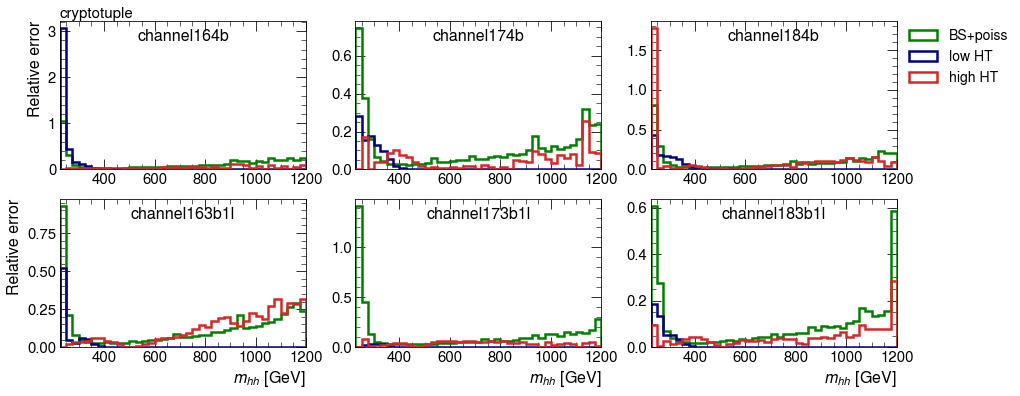

In [96]:
kwargs = {'bins':e, 'histtype':'step', 'lw':lw}

fig, axes = plt.subplots(2,3,figsize=(15,6))

for i, b_cat, ax_row in zip(range(2),['4b','3b1l'],axes):
    for j, yr, ax in zip(range(3),[16,17,18],ax_row):

        k = nameToIdx[f'{yr}{b_cat}']
        channel = ws_in['channels'][k]

        ax.text(.5,.95,channel['name'],transform=ax.transAxes,ha='center',va='top',fontsize=16)
               
        bkg = channel['samples'][1]
        nom = np.array(bkg['data'])

        poiss  = np.array(bkg['modifiers'][0]['data'])
        # histosys has low and high variations - only need one, will display abs
        lowHT  = np.array(bkg['modifiers'][1]['data']['hi_data'])
        highHT = np.array(bkg['modifiers'][2]['data']['hi_data'])
        
        ax.hist(xx,weights=poiss/nom,label='BS+poiss',color='green', **kwargs)
        ax.hist(xx,weights=np.abs(lowHT/nom - 1),label='low HT',color='navy', **kwargs)
        ax.hist(xx,weights=np.abs(highHT/nom- 1),label='high HT',color='C3', **kwargs)
        
        if 'log' in kwargs.keys():
            ax.plot(xx,0.05 * np.ones_like(xx),'k',ls='--',lw=lw)
            ax.plot(xx,0.005 * np.ones_like(xx),'grey',ls='--',lw=lw)
        ax.set_xlim(r)
        
for ax in ax_row: 
    ax.set_xlabel('$m_{hh}$ [GeV]',loc='right',fontsize=16)
for i in range(2):
    axes[i,0].set_ylabel('Relative error',loc='top',fontsize=16)  
axes[0,-1].legend(bbox_to_anchor=(1,1.03))

axes[0,0].text(0,1,'cryptotuple',ha='left',va='bottom',transform=axes[0,0].transAxes)

plt.savefig(f'figures/cryptotuples/rel_err.pdf',bbox_inches='tight')

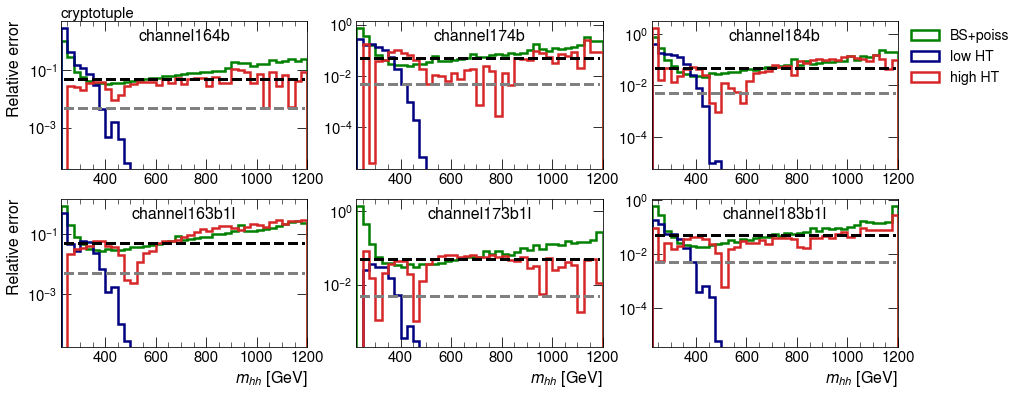

In [93]:

kwargs = {'bins':e, 'histtype':'step', 'lw':lw,'log': True}

fig, axes = plt.subplots(2,3,figsize=(15,6))

for i, b_cat, ax_row in zip(range(2),['4b','3b1l'],axes):
    for j, yr, ax in zip(range(3),[16,17,18],ax_row):

        k = nameToIdx[f'{yr}{b_cat}']
        channel = ws_in['channels'][k]

        ax.text(.5,.95,channel['name'],transform=ax.transAxes,ha='center',va='top',fontsize=16)
               
        bkg = channel['samples'][1]
        nom = np.array(bkg['data'])

        poiss  = np.array(bkg['modifiers'][0]['data'])
        # histosys has low and high variations - only need one, will display abs
        lowHT  = np.array(bkg['modifiers'][1]['data']['hi_data'])
        highHT = np.array(bkg['modifiers'][2]['data']['hi_data'])
        
        ax.hist(xx,weights=poiss/nom,label='BS+poiss',color='green', **kwargs)
        ax.hist(xx,weights=np.abs(lowHT/nom - 1),label='low HT',color='navy', **kwargs)
        ax.hist(xx,weights=np.abs(highHT/nom- 1),label='high HT',color='C3', **kwargs)
        
        if 'log' in kwargs.keys():
            ax.plot(xx,0.05 * np.ones_like(xx),'k',ls='--',lw=lw)
            ax.plot(xx,0.005 * np.ones_like(xx),'grey',ls='--',lw=lw)
        ax.set_xlim(r)
        
for ax in ax_row: 
    ax.set_xlabel('$m_{hh}$ [GeV]',loc='right',fontsize=16)
for i in range(2):
    axes[i,0].set_ylabel('Relative error',loc='top',fontsize=16)  
axes[0,-1].legend(bbox_to_anchor=(1,1.03))

axes[0,0].text(0,1,'cryptotuple',ha='left',va='bottom',transform=axes[0,0].transAxes)

plt.savefig(f'figures/cryptotuples/rel_err_log_pruning.pdf',bbox_inches='tight')